# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aini Nurpadilah
- **Email:** aininurfadilah354@gmail.com
- **ID Dicoding:** aininrp

## Menentukan Pertanyaan Bisnis

- Hari apa dalam seminggu yang memiliki peminjaman sepeda tertinggi?
- Berapa total jumlah sepeda yang dipinjam oleh pengguna terdaftar (registered) dan tidak terdaftar (casual) pada hari tertentu?
- Pada musim apa sepeda paling sering dipinjam, dan bagaimana perbandingannya dengan musim lainnya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
# Hour Dataframe
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isna().sum() # cek missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
print("Jumlah Duplikasi : ", hour_df.duplicated().sum())

Jumlah Duplikasi :  0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' ada kesalahan tipe data yang seharusnya 'date' menjadi 'object'

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
print("Jumlah Duplikasi : ", day_df.duplicated().sum())

Jumlah Duplikasi :  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' ada kesalahan tipe data yang seharusnya 'date' menjadi 'object'

### Cleaning Data

In [13]:
# mengubah tipe data
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

dataframe hour and day bagian columns dteday telah diubah tipe datanya menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman statistik di atas, data peminjaman sepeda dari tahun 2011 hingga 2012 menunjukkan bahwa jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang, sedangkan jumlah peminjam terbanyak mencapai 977 orang, dengan standar deviasi sebesar 181,39.

In [17]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman statistik data peminjaman sepeda dari tahun 2011 hingga 2012, rata-rata total peminjaman sepeda per hari adalah 4.504,35, dengan pengguna tidak terdaftar (*casual*) menyumbang rata-rata 848,18 peminjaman dan pengguna terdaftar (*registered*) sebanyak 3.656,17 peminjaman. Jumlah peminjaman minimum tercatat sebanyak 22, sedangkan jumlah maksimum mencapai 8.714 peminjaman. Kuartil pertama menunjukkan total peminjaman sebanyak 3.152, median 4.548, dan kuartil ketiga 5.956, dengan standar deviasi sebesar 1.937,21 yang mengindikasikan adanya variasi cukup besar dalam jumlah peminjaman per harinya.

In [18]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

Rata-rata peminjaman sepeda tertinggi pada tahun 2011 hingga 2012 terjadi di **Musim Gugur (season 3)** dengan rata-rata **236 sepeda per hari**, diikuti oleh **Musim Panas (season 2)** dengan rata-rata **208 sepeda per hari**. Sebaliknya, rata-rata peminjaman sepeda terendah terjadi di **Musim Semi (season 1)** dengan rata-rata **111 sepeda per hari**, sementara **Musim Dingin (season 4)** memiliki rata-rata **198 sepeda per hari**.

Hal ini menunjukkan bahwa aktivitas bersepeda cenderung lebih populer selama musim gugur dan panas, kemungkinan dipengaruhi oleh cuaca yang lebih mendukung.

In [19]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889


- Berdasarkan analisis data peminjaman sepeda yang dikelompokkan berdasarkan jam, terlihat bahwa jam sibuk dengan rata-rata peminjaman tertinggi terjadi pada pukul 17:00, yaitu sekitar 461 sepeda per jam, diikuti oleh pukul 18:00 dengan rata-rata 425 sepeda per jam, dan pukul 08:00 dengan rata-rata 359 sepeda per jam. Jam-jam ini kemungkinan bertepatan dengan aktivitas seperti pulang dan pergi kerja atau sekolah. Sebaliknya, aktivitas peminjaman sepeda paling rendah terjadi pada pukul 04:00, dengan rata-rata hanya 6 sepeda per jam, yang menunjukkan minimnya aktivitas pada waktu tersebut.

- Peminjaman tertinggi dalam satu jam terjadi pada pukul 18:00 dengan jumlah mencapai 977 sepeda/jam, sedangkan aktivitas mulai meningkat secara bertahap sejak pukul 06:00 dan menurun setelah pukul 22:00. Distribusi data menunjukkan bahwa jam sibuk seperti 17:00 memiliki variasi yang cukup besar (standar deviasi 232,65), sementara jam sepi seperti 04:00 memiliki variasi kecil (standar deviasi 4,14).

## Visualization & Explanatory Analysis

### Pertanyaan 1:
## Hari apa dalam seminggu yang memiliki peminjaman sepeda tertinggi?

In [20]:
 # Menghitung rata-rata peminjaman sepeda ('cnt') per hari dalam seminggu (weekday)
weekday_avg = hour_df.groupby('weekday')['cnt'].mean()

# Menampilkan hasil rata-rata peminjaman sepeda per hari dalam seminggu
print("Rata-rata peminjaman sepeda per hari dalam seminggu:")
print(weekday_avg)

# Menentukan hari dengan peminjaman sepeda tertinggi
max_loan_day = weekday_avg.idxmax()
max_loan_value = weekday_avg.max()

# Mengonversi angka hari dalam minggu ke nama hari
weekday_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Menampilkan hasil
print(f"\nHari dengan peminjaman sepeda tertinggi adalah: {weekday_names[max_loan_day]} dengan rata-rata peminjaman sepeda sebesar {max_loan_value:.2f} sepeda.")


Rata-rata peminjaman sepeda per hari dalam seminggu:
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64

Hari dengan peminjaman sepeda tertinggi adalah: Thursday dengan rata-rata peminjaman sepeda sebesar 196.44 sepeda.


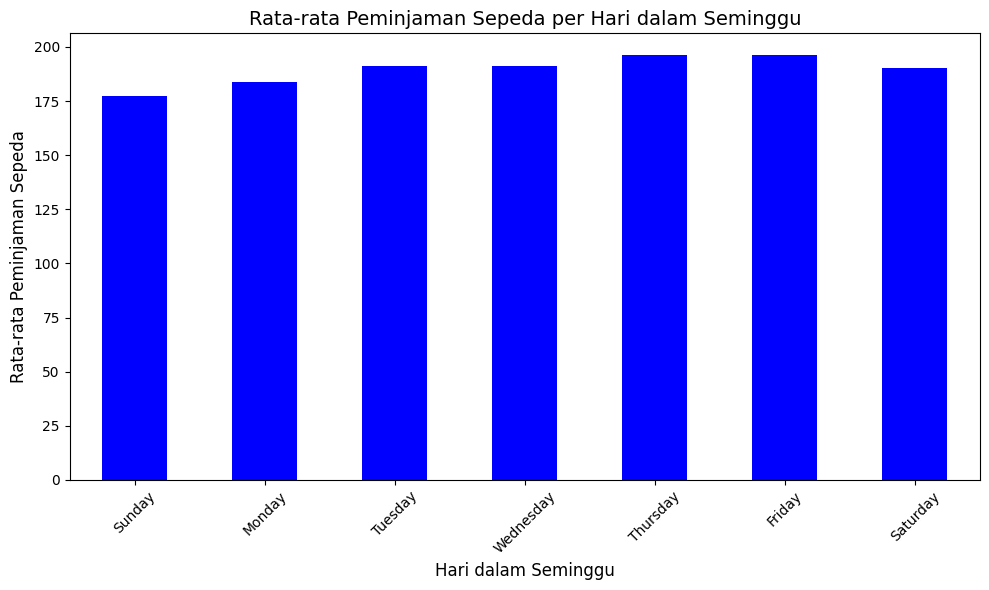

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='bar', color='blue')
plt.title('Rata-rata Peminjaman Sepeda per Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Rata-rata Peminjaman Sepeda', fontsize=12)
plt.xticks(ticks=range(7), labels=[weekday_names[i] for i in range(7)], rotation=45)
plt.tight_layout()

# Menampilkan diagram
plt.show()

Berdasarkan analisis data, rata-rata peminjaman sepeda tertinggi terjadi pada hari kamis

## Pertanyaan 2:
## Berapa total jumlah sepeda yang dipinjam oleh pengguna terdaftar (registered) dan tidak terdaftar (casual) pada hari tertentu?

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah peminjaman sepeda untuk pengguna 'casual' dan 'registered'
monthly_rentals = hour_df.groupby(hour_df['dteday'].dt.to_period('M')).agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Mengubah periode ke format string untuk tampilan yang lebih baik
monthly_rentals['date'] = monthly_rentals['dteday'].dt.strftime('%Y-%m')

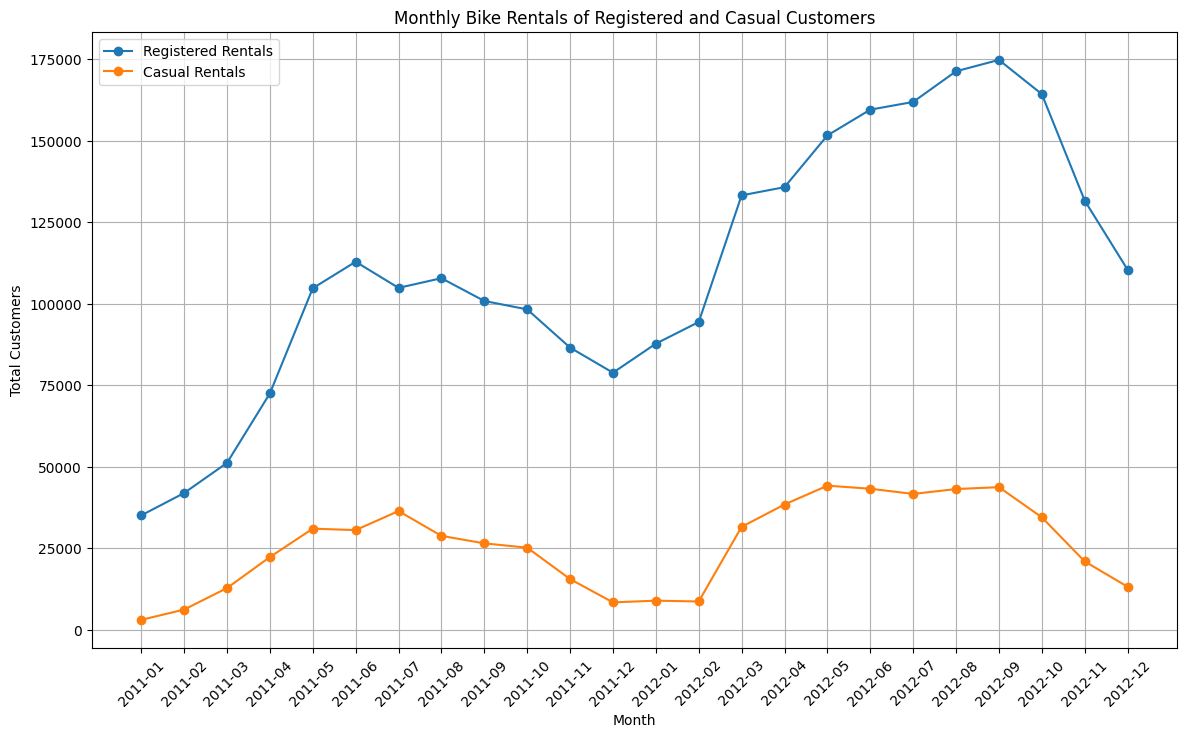

In [23]:
# Plotting data
plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['registered'], marker='o', label='Registered Rentals')
plt.plot(monthly_rentals['date'], monthly_rentals['casual'], marker='o', label='Casual Rentals')

# Menambahkan judul dan label
plt.title('Monthly Bike Rentals of Registered and Casual Customers')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

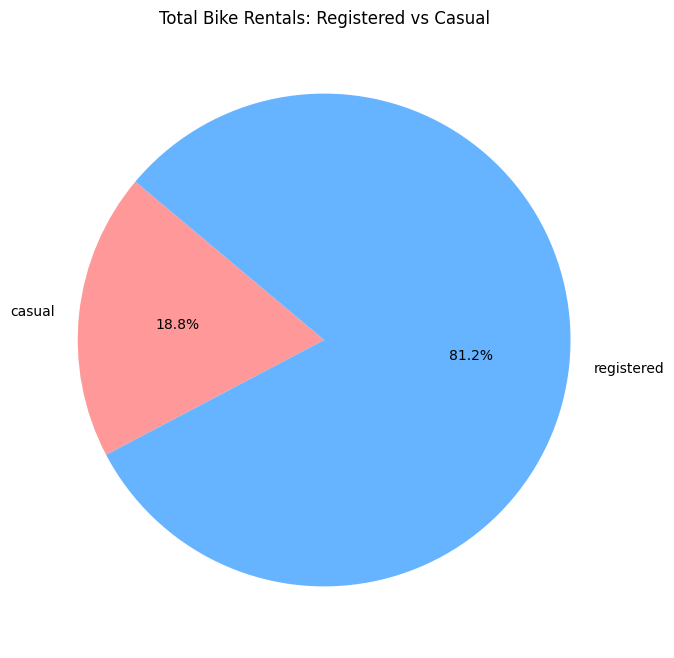

In [24]:
total_rentals = hour_df[['casual', 'registered']].sum()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(total_rentals, labels=total_rentals.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Menambahkan judul
plt.title('Total Bike Rentals: Registered vs Casual')

# Menampilkan plot
plt.show()

terlihat bahwa proporsi peminjaman sepeda oleh pengguna terdaftar (registered) jauh lebih besar dibandingkan dengan pengguna tidak terdaftar (casual).

## Pertanyaan 3:
## Pada musim apa sepeda paling sering dipinjam, dan bagaimana perbandingannya dengan musim lainnya?

In [25]:
main_df = hour_df.copy()
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

          dteday    yr      mnth  hr   weekday  season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday  Spring      Clear   16   
1     2011-01-01  2011   January   1  Saturday  Spring      Clear   40   
2     2011-01-01  2011   January   2  Saturday  Spring      Clear   32   
3     2011-01-01  2011   January   3  Saturday  Spring      Clear   13   
4     2011-01-01  2011   January   4  Saturday  Spring      Clear    1   
...          ...   ...       ...  ..       ...     ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday  Spring     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday  Spring     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday  Spring      Clear   90   
17377 2012-12-31  2012  December  22    Monday  Spring      Clear   61   
17378 2012-12-31  2012  December  23    Monday  Spring      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  

In [26]:
seasonal_counts = main_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

# Menampilkan musim dengan total peminjaman tertinggi
most_popular_season = seasonal_counts.idxmax()
most_popular_count = seasonal_counts.max()

print(f"Musim dengan peminjaman sepeda tertinggi adalah '{most_popular_season}' dengan total {most_popular_count:,} peminjaman.")
print("\nPerbandingan total peminjaman per musim:")
print(seasonal_counts)



Musim dengan peminjaman sepeda tertinggi adalah 'Fall' dengan total 1,061,129 peminjaman.

Perbandingan total peminjaman per musim:
season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64


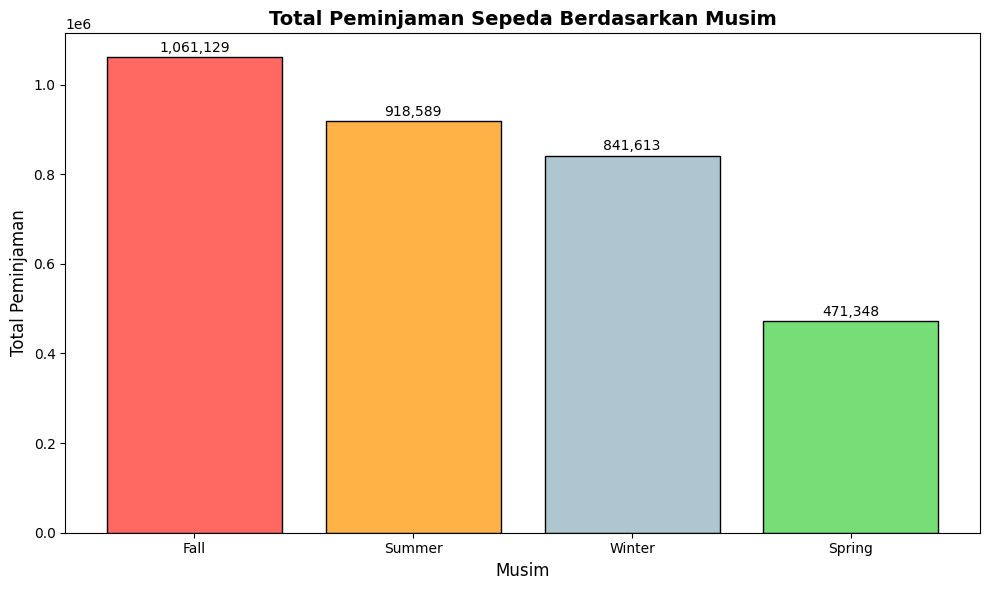

In [27]:
import matplotlib.pyplot as plt

season_colors = {
    'Winter': '#AEC6CF',
    'Spring': '#77DD77',
    'Summer': '#FFB347',
    'Fall': '#FF6961'
}

plt.figure(figsize=(10, 6))
sizes = seasonal_counts.values
labels = seasonal_counts.index
colors = [season_colors[label] for label in labels]

bars = plt.bar(labels, sizes, color=colors, edgecolor='black')

# Menambahkan angka di atas batang
for i, value in enumerate(sizes):
    plt.text(i, value + 5000, f"{value:,}", ha='center', va='bottom', fontsize=10)

# Menambahkan detail
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.title('Total Peminjaman Sepeda Berdasarkan Musim', fontsize=14, fontweight='bold')

# Tata letak
plt.tight_layout()
plt.show()

Berdasarkan analisis data, musim **Fall** tercatat sebagai periode dengan jumlah peminjaman sepeda tertinggi, yaitu mencapai 1,061,129 peminjaman. Posisi kedua ditempati oleh musim **Summer** dengan total 918,589 peminjaman, diikuti oleh **Winter** dengan 841,613 peminjaman. Sementara itu, musim **Spring** mencatatkan jumlah peminjaman terendah, yaitu sebanyak 471,348 peminjaman. Hal ini menunjukkan bahwa musim Fall kemungkinan besar menawarkan kondisi yang paling mendukung untuk aktivitas bersepeda, seperti cuaca yang nyaman dan mungkin adanya peningkatan aktivitas luar ruangan. Sebaliknya, musim Spring yang memiliki jumlah peminjaman terendah mungkin dipengaruhi oleh faktor lain, seperti kondisi cuaca yang kurang mendukung atau tingkat aktivitas masyarakat yang berbeda. Perbandingan ini memberikan gambaran jelas mengenai tren peminjaman sepeda di setiap musim.

## Conclusion

Berdasarkan analisis data peminjaman sepeda, berikut adalah kesimpulan utama:

1. **Hari dengan Rata-rata Peminjaman Tertinggi**  
   Hari **Kamis** mencatatkan rata-rata peminjaman sepeda tertinggi dengan **196,44 peminjaman**, sedikit lebih tinggi dibandingkan hari **Jumat** (196,14). Sebaliknya, rata-rata peminjaman terendah terjadi pada hari **Minggu** dengan **177,47 peminjaman**.

2. **Peminjaman oleh Pengguna Registered vs. Casual**  
   Pengguna **terdaftar (registered)** mendominasi peminjaman sepeda dibandingkan dengan pengguna **tidak terdaftar (casual)**. Proporsi ini terlihat jelas melalui diagram pie, yang menunjukkan bahwa sebagian besar peminjaman berasal dari pengguna registered.

3. **Musim dengan Peminjaman Tertinggi**  
   Musim **Fall** mencatat total peminjaman sepeda tertinggi sebanyak **1,061,129 peminjaman**, diikuti oleh **Summer** (918,589), **Winter** (841,613), dan yang terendah adalah **Spring** (471,348). Hal ini menunjukkan bahwa musim Fall cenderung menawarkan kondisi ideal untuk aktivitas bersepeda.

Analisis menunjukkan adanya tren musiman dan harian dalam aktivitas peminjaman sepeda, dengan hari kerja (terutama Kamis dan Jumat) serta musim Fall mencatatkan puncak aktivitas. Data ini memberikan wawasan yang berharga untuk pengelolaan sumber daya, promosi layanan, dan perencanaan kebijakan transportasi berbasis sepeda.